In [27]:
import pandas as pd
import numpy as np
from sklearn import preprocessing as pp
from neupy.algorithms import GRNN as grnn
from neupy.estimators import mse
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [28]:
dta = pd.read_excel('../Data/Seasonal.xlsx',index_col='Date')
# dta['Jan'] = dta['Month']==1
dta.head()

,Death,Death_rate,Incidence,Incidence_rate,forecast,Year,Month,error_ARIMA
Date,,,,,,,,
2005-01-01,143,0.011001,114194,8.784966,NaN,2005,1,NaN
2005-02-01,201,0.015463,87112,6.701542,NaN,2005,2,NaN
2005-03-01,281,0.021617,130134,10.011233,NaN,2005,3,NaN
2005-04-01,374,0.028772,133924,10.302798,NaN,2005,4,NaN
2005-05-01,388,0.029849,121326,9.333632,NaN,2005,5,NaN


In [29]:
data_train = dta.loc['2006-01-1':'2014-12-01'][['Incidence_rate','forecast']]
x_train = data_train.loc[:'2012-12-01'][['forecast']]
y_train = data_train.loc[:'2012-12-01']['Incidence_rate']
x_test = data_train.loc['2013-01-01':'2013-12-01'][['forecast']]
y_test = data_train['2013-01-01':'2013-12-01']['Incidence_rate']

In [30]:
data_train.head()

,Incidence_rate,forecast
Date,,
2006-01-01,9.287146,8.784970
2006-02-01,8.050797,7.004052
2006-03-01,8.992093,10.824013
2006-04-01,8.567867,9.688877
2006-05-01,8.350134,8.288524


In [31]:
def try_std(x):
    nn = grnn(std =x ,verbose=False)
    nn.train(x_train,y_train)
    y_pred = nn.predict(x_test)
    return mse(y_pred,y_test)

In [72]:
index = np.linspace(0.01,0.15,100)
error = [try_std(x) for x in np.linspace(0.01,0.15,100)]

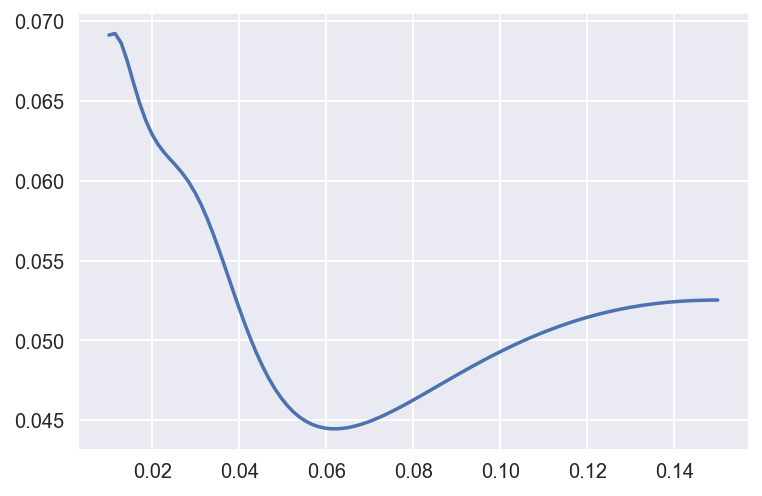

In [74]:
fig = plt.figure()
plt.plot(index,error)
fig.savefig('error.png',dpi=300)

In [34]:
try_std(x=0.0615)

0.04445359684201761

In [75]:
mod_GRNN = grnn(std = 0.0615 ,verbose=False)
mod_GRNN.train(x_train,y_train)
data_train['NN']=mod_GRNN.predict(data_train[['forecast']])
data_train.head()

,Incidence_rate,forecast,NN
Date,,,
2006-01-01,9.287146,8.784970,9.032050
2006-02-01,8.050797,7.004052,7.495389
2006-03-01,8.992093,10.824013,8.992093
2006-04-01,8.567867,9.688877,8.567860
2006-05-01,8.350134,8.288524,8.452995


In [76]:
data_train.to_excel('../Data/Seasonal_GRNN.xlsx')